# 1. Set-up

## 필요한 패키지 불러오기

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## 데이터 준비하기

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68616192/68606236 [==============================] - 0s 0us/step


In [3]:
path

'/aiffel/.keras/datasets/cats_and_dogs_filtered'

In [4]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [5]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## 데이터 증강(Data Augmentation)

In [8]:
# parameter Initialization
batch_size = 16
epochs = 10
IMG_HEIGHT = 256
IMG_WIDTH = 256

### 훈련용 데이터 준비하기

In [9]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [10]:
image_gen_train    # type: ImageDataGenerator

In [11]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
train_data_gen    # type: DirectoryIterator

In [13]:
train_data_gen[0]    # batch_size인 16에 해당하는 이미지 16개와 레이블 16개

(array([[[[0.33333334, 0.3137255 , 0.2901961 ],
          [0.33333334, 0.3137255 , 0.2901961 ],
          [0.33333334, 0.3137255 , 0.2901961 ],
          ...,
          [0.37613022, 0.36044395, 0.31338513],
          [0.3643109 , 0.34862462, 0.30156577],
          [0.35525578, 0.3395695 , 0.29527497]],
 
         [[0.33333334, 0.3137255 , 0.2901961 ],
          [0.33333334, 0.3137255 , 0.2901961 ],
          [0.33333334, 0.3137255 , 0.2901961 ],
          ...,
          [0.37616736, 0.36048108, 0.31342226],
          [0.364348  , 0.3486617 , 0.30160287],
          [0.35528052, 0.33959424, 0.2952873 ]],
 
         [[0.33333334, 0.3137255 , 0.2901961 ],
          [0.33333334, 0.3137255 , 0.2901961 ],
          [0.33333334, 0.3137255 , 0.2901961 ],
          ...,
          [0.37620446, 0.3605182 , 0.31345934],
          [0.36438507, 0.3486988 , 0.30163997],
          [0.35530525, 0.33961898, 0.29529968]],
 
         ...,
 
         [[0.89019614, 0.89019614, 0.89019614],
          [0.89019

In [14]:
train_data_gen[0][0]    # 이미지 16개 (레이블 16개 없이)

array([[[[0.27908128, 0.25947344, 0.23594403],
         [0.2786204 , 0.25901255, 0.23548311],
         [0.27815947, 0.25855163, 0.23502222],
         ...,
         [0.3351813 , 0.31165186, 0.24890676],
         [0.34865436, 0.32512492, 0.26237983],
         [0.36078432, 0.3372549 , 0.27450982]],

        [[0.2669332 , 0.24732538, 0.22379597],
         [0.26700756, 0.2473997 , 0.22387029],
         [0.2670819 , 0.24747406, 0.22394465],
         ...,
         [0.3366854 , 0.31315598, 0.25041085],
         [0.35036278, 0.32683337, 0.26408827],
         [0.36078432, 0.3372549 , 0.27450982]],

        [[0.3121343 , 0.29252645, 0.26899704],
         [0.3118221 , 0.29221424, 0.26868483],
         [0.31150985, 0.291902  , 0.2683726 ],
         ...,
         [0.34529427, 0.32176486, 0.25901976],
         [0.33111197, 0.30758256, 0.24483745],
         [0.32603532, 0.3025059 , 0.23976082]],

        ...,

        [[0.7818539 , 0.7202308 , 0.74174285],
         [0.7821067 , 0.7205579 , 0.74204016]

In [15]:
train_data_gen[0][1]    # 레이블 16개 (이미지 16개 없이)

array([0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

In [16]:
train_data_gen[0][0][0]    # 이미지 16개 중에 첫번째 이미지 데이터(numpy 배열 형태)

array([[[0.35528883, 0.30948916, 0.25490198],
        [0.35527623, 0.30948666, 0.25490198],
        [0.35526365, 0.3094841 , 0.25490198],
        ...,
        [0.16849643, 0.14888859, 0.12535918],
        [0.08102464, 0.06141679, 0.03788738],
        [0.10815343, 0.08854558, 0.06501617]],

       [[0.3388554 , 0.30620247, 0.25490198],
        [0.33884278, 0.30619994, 0.25490198],
        [0.3388302 , 0.30619743, 0.25490198],
        ...,
        [0.21279742, 0.19318958, 0.16966017],
        [0.11443119, 0.09482335, 0.07129394],
        [0.11645231, 0.09684446, 0.07331505]],

       [[0.31945536, 0.294016  , 0.24006902],
        [0.31944025, 0.29400593, 0.24005641],
        [0.3194251 , 0.29399583, 0.2400438 ],
        ...,
        [0.18628025, 0.16667241, 0.143143  ],
        [0.1619569 , 0.14234906, 0.11881965],
        [0.12221485, 0.102607  , 0.07907759]],

       ...,

       [[0.6994622 , 0.6720112 , 0.6484818 ],
        [0.69946975, 0.67201877, 0.64848936],
        [0.6994773 , 0

In [17]:
print(train_data_gen[0][0].shape)
print(train_data_gen[0][0][0].shape)

(16, 256, 256, 3)
(256, 256, 3)


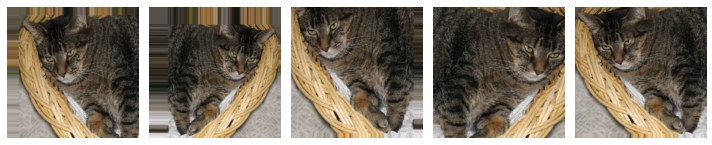

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### 검증용 데이터 준비하기

In [19]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [20]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


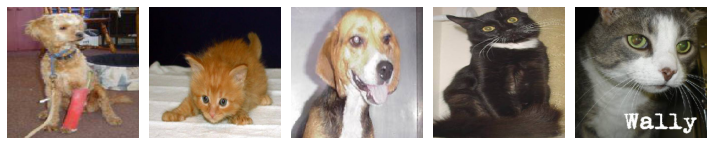

In [21]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [22]:
_[:5] # 정답 데이터

array([1., 0., 1., 0., 0.], dtype=float32)

# 2. VGG16 모델 구현하기

In [23]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.  
input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(1000, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584

In [24]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [25]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      callbacks=callbacks,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/10
125/125 [==============================] - 88s 345ms/step - loss: 789.0231 - binary_accuracy: 0.5000 - val_loss: 5.4503 - val_binary_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 41s 328ms/step - loss: 0.7080 - binary_accuracy: 0.5000 - val_loss: 1029.8751 - val_binary_accuracy: 0.5000
Epoch 3/10
125/125 [==============================] - 42s 334ms/step - loss: 0.8158 - binary_accuracy: 0.5000 - val_loss: 2.1166 - val_binary_accuracy: 0.5000
Epoch 4/10
125/125 [==============================] - 42s 333ms/step - loss: 0.7066 - binary_accuracy: 0.5000 - val_loss: 0.6924 - val_binary_accuracy: 0.5000
Epoch 5/10
125/125 [==============================] - 42s 333ms/step - loss: 0.6940 - binary_accuracy: 0.5000 - val_loss: 0.6935 - val_binary_accuracy: 0.5000
Epoch 6/10
125/125 [==============================] - 42s 331ms/step - loss: 0.6938 - binary_accuracy: 0.5000 - val_loss: 0.7573 - val_binary_accuracy: 0.5000
Epoch 7/10
125/125 [=====================

In [26]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

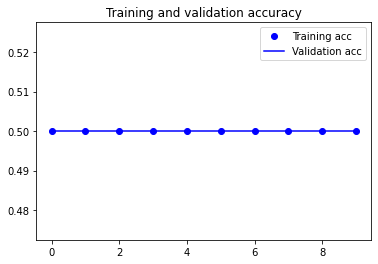

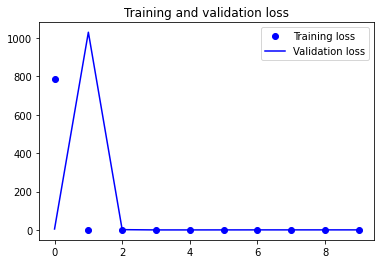

In [27]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## checkpoint 모델 불러와 평가하기

In [28]:
test_model = tf.keras.models.load_model("feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = test_model.evaluate(val_data_gen)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 6s 85ms/step - loss: 0.6924 - binary_accuracy: 0.5000
테스트 정확도: 0.500


# 3. 다양한 방법을 사용하여 모델의 성능 올리기
- 하이퍼파라미터 중 batch_size 늘리기
- Pre-trained 모델을 사용해 비교하기

## 하이퍼파라미터 변경하기

In [29]:
# 문제 1-2. hyperparameter 설정
batch_size = 32
epochs = 20
IMG_HEIGHT = 256
IMG_WIDTH = 256

## 입력 데이터 파이프라인 준비하기

In [30]:
# 문제 1-2. 데이터 generator 생성
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Pre-trained 모델 활용해 모델 정의, 컴파일, 훈련

In [31]:
# pre-trained 모델 사용해 모델 정의하기
# VGG16 합성곱 기반 층 만들고 동결하기
conv_base  = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = False

conv_base.summary()

# 데이터 증강
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

# 모델 정의
inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [32]:
# 옵티마이저 adam --> rmsprop으로 변경
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]

In [33]:
# 데이터 증강된 이미지로 모델 학습
history = model.fit(
    train_data_gen,
    epochs=20,
    validation_data=val_data_gen,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 41s 532ms/step - loss: 17.3133 - accuracy: 0.4965 - val_loss: 5.9565 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 34s 537ms/step - loss: 11.0357 - accuracy: 0.5135 - val_loss: 5.9333 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 33s 528ms/step - loss: 8.7427 - accuracy: 0.4965 - val_loss: 9.8955 - val_accuracy: 0.5000
Epoch 4/20
63/63 [==============================] - 34s 531ms/step - loss: 6.0103 - accuracy: 0.5020 - val_loss: 1.8588 - val_accuracy: 0.5020
Epoch 5/20
63/63 [==============================] - 34s 531ms/step - loss: 3.6891 - accuracy: 0.4900 - val_loss: 2.6234 - val_accuracy: 0.5000
Epoch 6/20
63/63 [==============================] - 34s 532ms/step - loss: 2.0561 - accuracy: 0.4865 - val_loss: 1.0205 - val_accuracy: 0.5030
Epoch 7/20
63/63 [==============================] - 33s 530ms/step - loss: 1.0047 - accuracy: 0.4790 - val_loss: 0.7768 - val_accuracy: 0.49

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

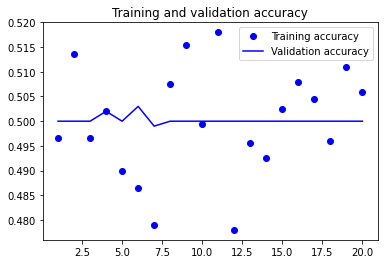

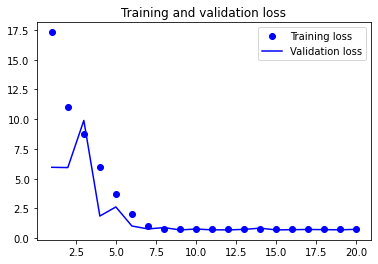

In [35]:
# 훈련 및 검증 그래프 그리기
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [36]:
test_model = tf.keras.models.load_model("feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = test_model.evaluate(val_data_gen)
print(f"테스트 정확도: {test_acc:.3f}")

32/32 [==============================] - 5s 144ms/step - loss: 0.6920 - accuracy: 0.5000
테스트 정확도: 0.500


# 4. Object Detection 모델 사용하기

In [37]:
!pip3 install tensorflow-estimator==2.6.0

     |████████████████████████████████| 462 kB 4.3 MB/s            
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.4 which is incompatible.
tensorflow-gpu 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow-gpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.0.1 which is incompatible.


In [38]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [39]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [40]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [41]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [42]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

## 원하는 이미지 불러오기

Image downloaded to /tmp/tmp5bg7xc78.jpg.


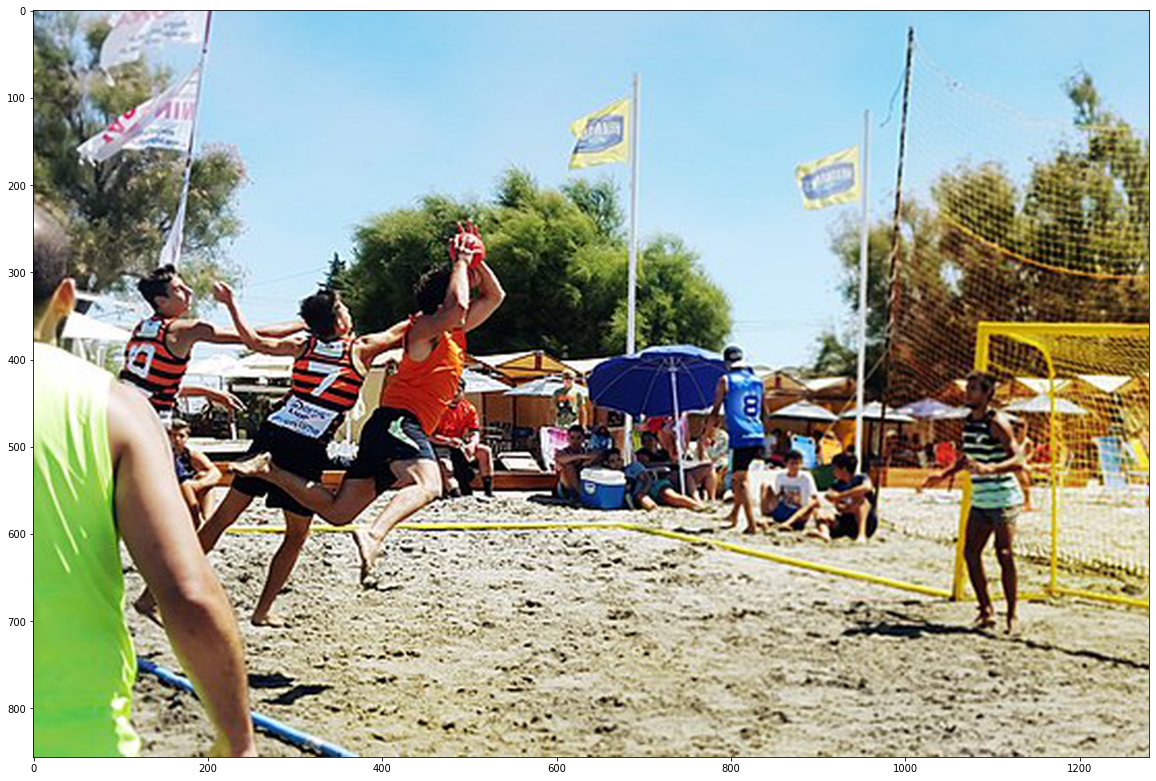

In [43]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

## Pre-trained InceptionResNet 모델 불러오기

In [45]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [46]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [47]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
#   converted_img  = tf.image.convert_image_dtype(img, tf.uint8)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)
  print(result.keys())

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])
  # image_with_boxes = draw_boxes(
  #     img.numpy(), result["detection_boxes"],
  #     result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

## detector 실행

Found 100 objects.
Inference time:  38.565288066864014
dict_keys(['detection_boxes', 'detection_class_entities', 'detection_class_labels', 'detection_scores', 'detection_class_names'])


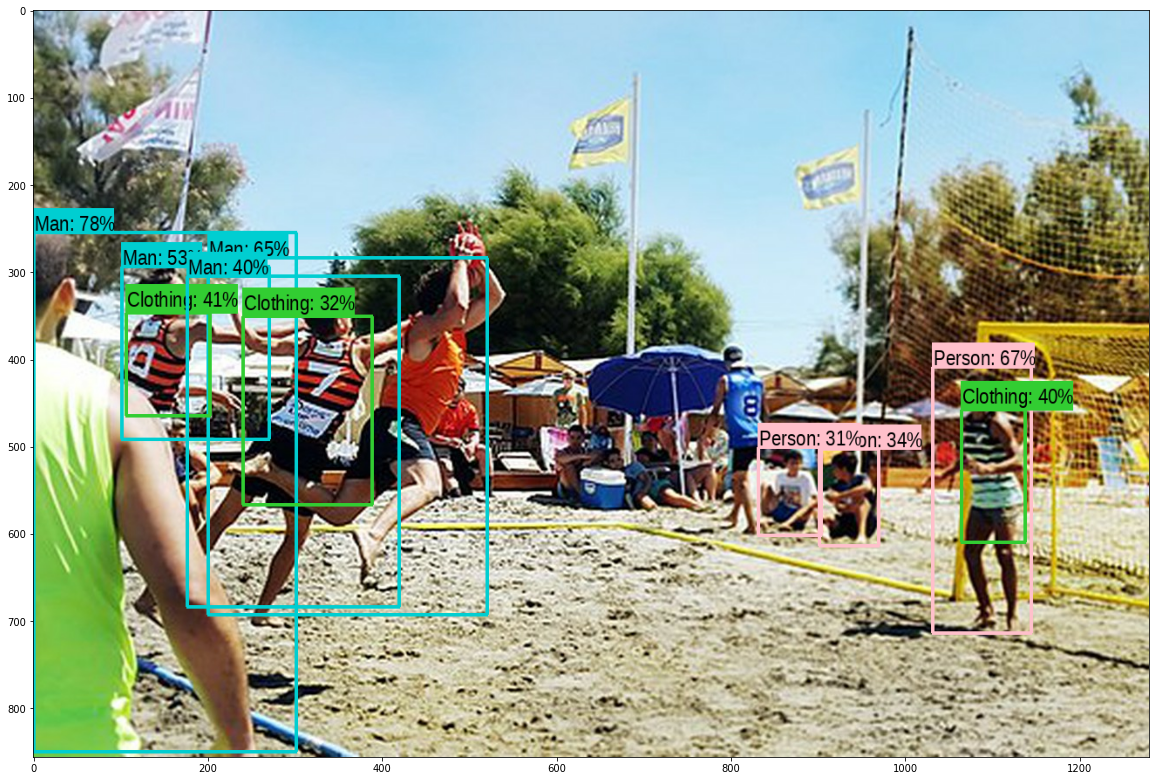

In [48]:
run_detector(detector, downloaded_image_path)

## 문제 2-1. 다른 이미지 테스트해보기

Image downloaded to /tmp/tmphgzi4ndp.jpg.


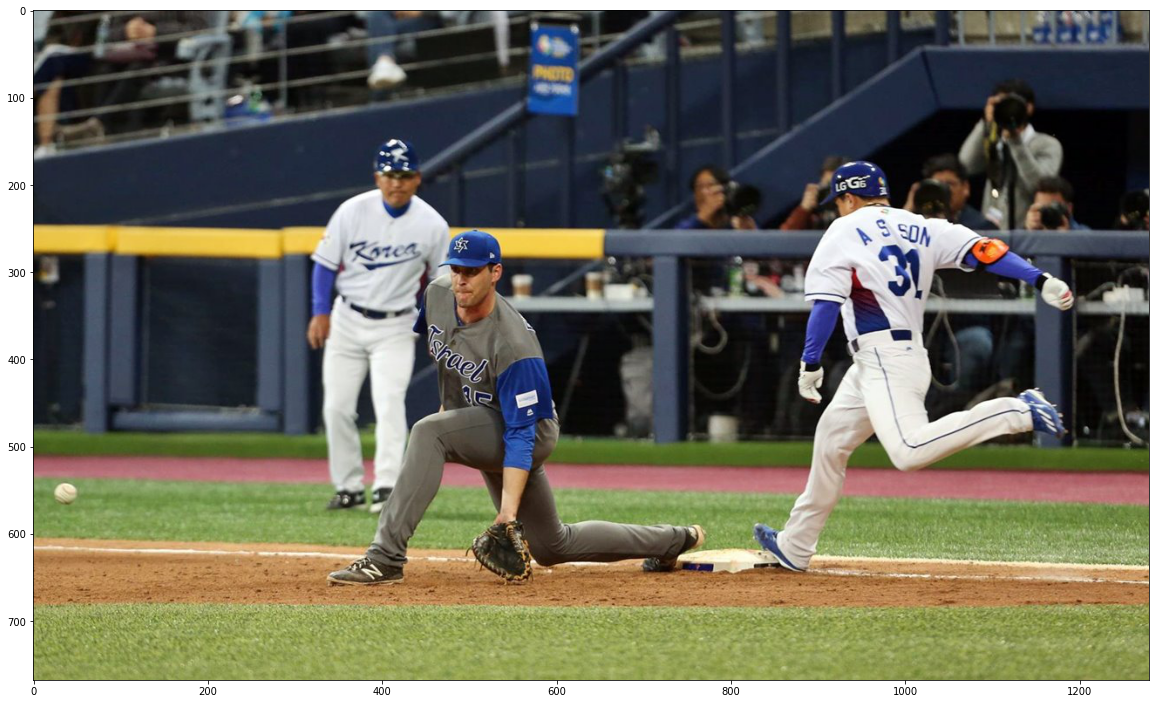

In [49]:
# 이미지 불러오기
image_url = "https://th.bing.com/th/id/R.c79f44e53fbe5ab82affb1326a7d77b4?rik=%2bNHK7uzOmczuag&riu=http%3a%2f%2fstatic.wbsc.org.s3.amazonaws.com%2fwp-content%2fuploads%2fISRvKOR-WBC-2017.jpg%3f4f9150&ehk=cKbN3HfeV5HuB8toNF38FS6RZM%2fKR0Tw2FThaoqqnJ0%3d&risl=&pid=ImgRaw&r=0"
downloaded_image_path = download_and_resize_image(image_url, 1280, 768, True)

Found 100 objects.
Inference time:  3.6227786540985107
dict_keys(['detection_boxes', 'detection_class_entities', 'detection_class_labels', 'detection_scores', 'detection_class_names'])


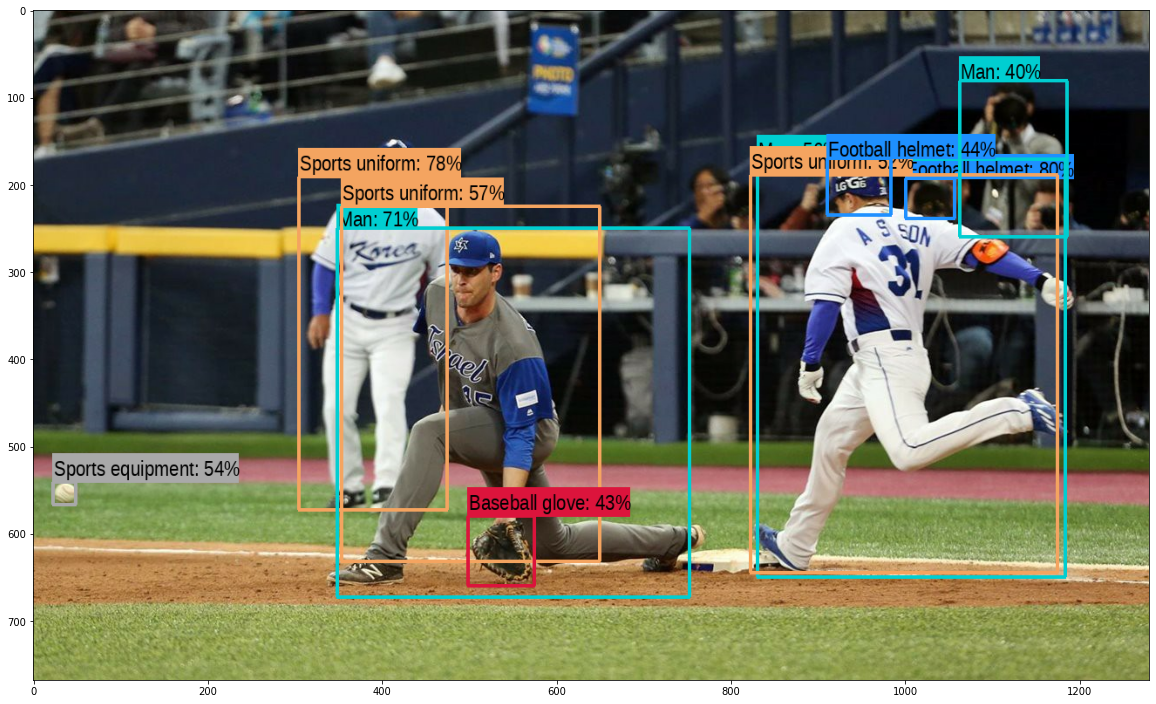

In [50]:
# 테스트
run_detector(detector, downloaded_image_path)

## 문제 2-2. 다양한 pre-trained model 테스트해보기
- EfficientDet 모델 활용해 비교하기

In [51]:
# 문제 2-2. 모델 불러오기
module_handle = "https://tfhub.dev/tensorflow/efficientdet/d0/1"    # EfficientDet 모델  

# detector = hub.load(module_handle).signatures['default1'] # detector에 사용할 모듈 저장
detector = hub.load(module_handle)    # detector에 사용할 모듈 저장

In [54]:
def run_detector(detector, path):
  img = load_img(path) 

#   converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  converted_img  = tf.image.convert_image_dtype(img, tf.uint8)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)
  print(result.keys())

# 이미지 내 박스로 entity, scores를 추가하여 출력
#   image_with_boxes = draw_boxes(
#       img.numpy(), result["detection_boxes"],
#       result["detection_class_entities"], result["detection_scores"])
#   image_with_boxes = draw_boxes(
#       img.numpy(), result["detection_boxes"],
#       result["detection_class_entities"], result["detection_scores"])

  display_image(img)

Found 1 objects.
Inference time:  0.12368988990783691
dict_keys(['raw_detection_boxes', 'detection_anchor_indices', 'detection_boxes', 'raw_detection_scores', 'detection_classes', 'num_detections', 'detection_scores', 'detection_multiclass_scores'])


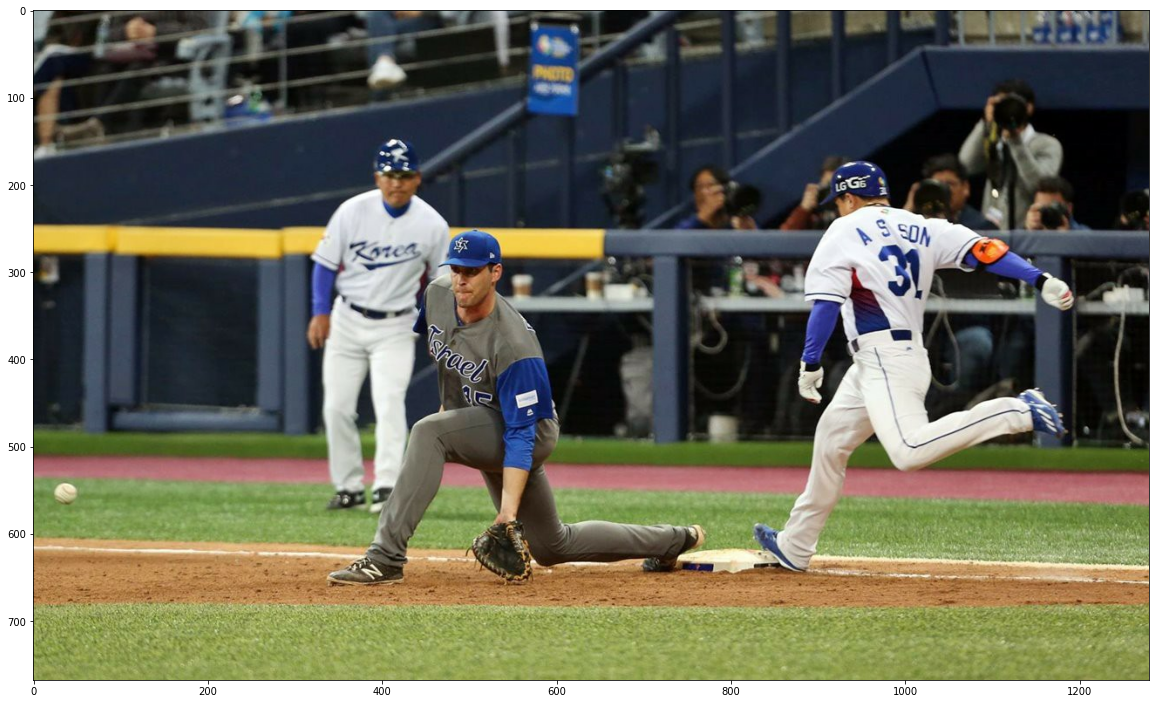

In [55]:
# 문제 2-2. 테스트 
run_detector(detector, downloaded_image_path)

In [56]:
# 문제 2-2. 결과 비교
print("1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.") 
print("2번째 모델인 result KeyError가 발생함.")

1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.
2번째 모델인 result KeyError가 발생함.
